# Challenge: Sentiment Analysis for ImDb Movies

### About Dataset


> IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

#### [Link to the Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

### 1. Import Libraries and Dataset

**1.1 Import the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from pprint import pprint
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from gensim.models import Word2Vec


**1.2 Download Modules from nltk**

In [2]:
nltk.download(['stopwords', 'movie_reviews', 'wordnet'])
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/priyankadhamija/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/priyankadhamija/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/priyankadhamija/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/priyankadhamija/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**1.3 Read the dataset**

In [3]:
pd.set_option('display.max_colwidth', None) #Dispay the entire row
df = pd.read_csv(r'Imdb Dataset.csv')
df.head(3)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive


### 2. Data Manipulation & EDA

In [4]:
print('Shape of the dataset:', df.shape)
print('Summary of the dataset:') 
df.describe() #There are a few duplicates in the reviews

Shape of the dataset: (50000, 2)
Summary of the dataset:


,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


**2.1 View and Drop duplicates**

In [5]:
#Drop the duplicates
df = df.drop_duplicates()

**2.1.1 Verify if there are any null values, No nulls**

In [6]:
df[df.isnull().any(axis = 1)]

,review,sentiment


**2.1.2 Remove the numeric digits**

In [7]:
df['review'] = [re.sub(r'\b(?:\d+|\w)\b\s*', '', x) for x in df['review']]
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,"One of the other reviewers has mentioned that after watching just Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />would say the main appeal of the show is due to the fact that it goes where other shows wouldn'dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn'mess around. The first episode ever saw struck me as so nasty it was surreal, couldn'say was ready for it, but as watched more, developed taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
freq,1,24884


**2.2 Check class balance. Class looks balanced**

In [8]:
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

**2.3 Plot sentiment class distribution**

**2.3.1 Plot Pie Chart for % Class Distribution**

<ipython-input-9-b5ab0f1b3cd7>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0, 0.5, '')

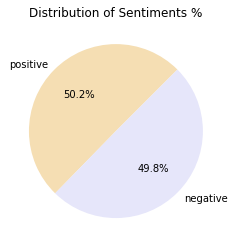

In [9]:
sentiment_sort = df['sentiment'].value_counts().sort_values(ascending = False)
sentiment_sort.plot.pie(autopct="%1.1f%%", colors = ["wheat", "lavender"], labels = sentiment_sort.index, startangle=45 )
plt.title("Distribution of Sentiments %")
plt.axes().set_ylabel('')

**2.3.2 Plot Bar Chart for Abs Class Distribution**

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


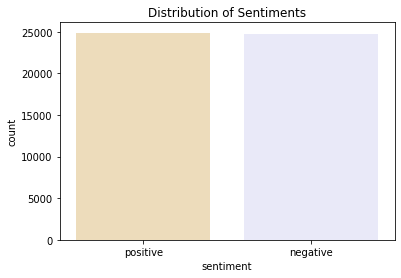

In [10]:
ax = sns.countplot(df.sentiment, palette =  ["wheat", "lavender"])
plt.title('Distribution of Sentiments')
plt.show()

**2.4 Remove html tags and convert to lower case**

In [11]:
# Write a function to remove html tags
def remove_html_tags(col):
    col = (col.str.replace(r'<[^<>]*>', '', regex=True))
    return col

In [12]:
df['review'] = df['review'].astype(str).str.lower()
df['review'] = remove_html_tags(df['review'])
df.head(3)

,review,sentiment
0,"one of the other reviewers has mentioned that after watching just oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.would say the main appeal of the show is due to the fact that it goes where other shows wouldn'dare. forget pretty pictures painted for mainstream audiences, forget charm, forget romance...oz doesn'mess around. the first episode ever saw struck me as so nasty it was surreal, couldn'say was ready for it, but as watched more, developed taste for oz, and got accustomed to the high levels of graphic violence. not just violence, but injustice (crooked guards who'll be sold out for nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) watching oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only ""has got all the polari"" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is terrificly written and performed piece. masterful production about one of the great master'of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell'murals decorating every surface) are terribly well done.",positive
2,"thought this was wonderful way to spend time on too hot summer weekend, sitting in the air conditioned theater and watching light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point : risk addiction, thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most 'laughed at one of woody'comedies in years (dare say decade?). while 've never been impressed with scarlet johanson, in this she managed to tone down her ""sexy"" image and jumped right into average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than ""devil wears prada"" and more interesting than ""superman"" great comedy to go see with friends.",positive


In [13]:
df.describe()

,review,sentiment
count,49582,49582
unique,49581,2
top,"this movie got off to an interesting start. down the road however, the story gets convoluted with poor illustration of ancient black magic rituals. the male lead was very good , even though he gets the worst end of the stick in the climax. in comparison, this is ""boomerang"" meets ""extremities"".",positive
freq,2,24884


**Drop the duplicates again**

In [14]:
df = df.drop_duplicates()
#df.describe()

### 3. Use NLTK to analyze the Reviews

**3.1 Lemmatize the words**

In [15]:
def lemmatize_words(text):
    words = text.split()
    words = [WordNetLemmatizer().lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
df['review'] = df['review'].apply(lemmatize_words)
df.head(3)

,review,sentiment
0,"one of the other reviewers have mention that after watch just oz episode you'll be hooked. they be right, as this be exactly what happen with me.the first thing that strike me about oz be its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this be not show for the faint hearted or timid. this show pull no punch with regard to drugs, sex or violence. its be hardcore, in the classic use of the word.it be call oz as that be the nickname give to the oswald maximum security state penitentary. it focus mainly on emerald city, an experimental section of the prison where all the cells have glass front and face inwards, so privacy be not high on the agenda. em city be home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy deal and shady agreements be never far away.would say the main appeal of the show be due to the fact that it go where other show wouldn'dare. forget pretty picture paint for mainstream audiences, forget charm, forget romance...oz doesn'mess around. the first episode ever saw strike me as so nasty it be surreal, couldn'say be ready for it, but as watch more, develop taste for oz, and get accustom to the high level of graphic violence. not just violence, but injustice (crooked guard who'll be sell out for nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates be turn into prison bitch due to their lack of street skills or prison experience) watch oz, you may become comfortable with what be uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"wonderful little production. the film technique be very unassuming- very old-time-bbc fashion and give comforting, and sometimes discomforting, sense of realism to the entire piece. the actors be extremely well chosen- michael sheen not only ""has get all the polari"" but he have all the voice down pat too! you can truly see the seamless edit guide by the reference to williams' diary entries, not only be it well worth the watch but it be terrificly write and perform piece. masterful production about one of the great master'of comedy and his life. the realism really come home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remain solid then disappears. it play on our knowledge and our senses, particularly with the scenes concern orton and halliwell and the set (particularly of their flat with halliwell'murals decorate every surface) be terribly well done.",positive
2,"think this be wonderful way to spend time on too hot summer weekend, sit in the air condition theater and watch light-hearted comedy. the plot be simplistic, but the dialogue be witty and the character be likable (even the well bread suspect serial killer). while some may be disappoint when they realize this be not match point : risk addiction, think it be proof that woody allen be still fully in control of the style many of us have grow to love.this be the most 'laughed at one of woody'comedies in years (dare say decade?). while 've never be impress with scarlet johanson, in this she manage to tone down her ""sexy"" image and jump right into average, but spirit young woman.this may not be the crown jewel of his career, but it be wittier than ""devil wear prada"" and more interest than ""superman"" great comedy to go see with friends.",positive


In [16]:
df.describe()

,review,sentiment
count,49581,49581
unique,49581,2
top,"one of the other reviewers have mention that after watch just oz episode you'll be hooked. they be right, as this be exactly what happen with me.the first thing that strike me about oz be its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this be not show for the faint hearted or timid. this show pull no punch with regard to drugs, sex or violence. its be hardcore, in the classic use of the word.it be call oz as that be the nickname give to the oswald maximum security state penitentary. it focus mainly on emerald city, an experimental section of the prison where all the cells have glass front and face inwards, so privacy be not high on the agenda. em city be home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy deal and shady agreements be never far away.would say the main appeal of the show be due to the fact that it go where other show wouldn'dare. forget pretty picture paint for mainstream audiences, forget charm, forget romance...oz doesn'mess around. the first episode ever saw strike me as so nasty it be surreal, couldn'say be ready for it, but as watch more, develop taste for oz, and get accustom to the high level of graphic violence. not just violence, but injustice (crooked guard who'll be sell out for nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates be turn into prison bitch due to their lack of street skills or prison experience) watch oz, you may become comfortable with what be uncomfortable viewing....thats if you can get in touch with your darker side.",positive
freq,1,24884


**3.2 Remove English stopwords from nltk**

**3.2.1 Load English stopwords from nltk**

In [17]:
stopwords = nltk.corpus.stopwords.words("english")

**3.2.2 Add other stopwords like movie**

In [18]:
stopwords.extend(['movies', 'movie', 'film', 'films'])

**3.2.3 Tokenize the words**

In [19]:
#Create an additional column with tokenized words
regexp = RegexpTokenizer('\w+')
df['review_token']=df['review'].apply(regexp.tokenize)
df.head(3)

,review,sentiment,review_token
0,"one of the other reviewers have mention that after watch just oz episode you'll be hooked. they be right, as this be exactly what happen with me.the first thing that strike me about oz be its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this be not show for the faint hearted or timid. this show pull no punch with regard to drugs, sex or violence. its be hardcore, in the classic use of the word.it be call oz as that be the nickname give to the oswald maximum security state penitentary. it focus mainly on emerald city, an experimental section of the prison where all the cells have glass front and face inwards, so privacy be not high on the agenda. em city be home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy deal and shady agreements be never far away.would say the main appeal of the show be due to the fact that it go where other show wouldn'dare. forget pretty picture paint for mainstream audiences, forget charm, forget romance...oz doesn'mess around. the first episode ever saw strike me as so nasty it be surreal, couldn'say be ready for it, but as watch more, develop taste for oz, and get accustom to the high level of graphic violence. not just violence, but injustice (crooked guard who'll be sell out for nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates be turn into prison bitch due to their lack of street skills or prison experience) watch oz, you may become comfortable with what be uncomfortable viewing....thats if you can get in touch with your darker side.",positive,"[one, of, the, other, reviewers, have, mention, that, after, watch, just, oz, episode, you, ll, be, hooked, they, be, right, as, this, be, exactly, what, happen, with, me, the, first, thing, that, strike, me, about, oz, be, its, brutality, and, unflinching, scenes, of, violence, which, set, in, right, from, the, word, go, trust, me, this, be, not, show, for, the, faint, hearted, or, timid, this, show, pull, no, punch, with, regard, to, drugs, sex, or, violence, its, be, hardcore, in, the, classic, use, of, the, word, it, be, call, oz, as, that, be, the, nickname, give, to, the, oswald, maximum, ...]"
1,"wonderful little production. the film technique be very unassuming- very old-time-bbc fashion and give comforting, and sometimes discomforting, sense of realism to the entire piece. the actors be extremely well chosen- michael sheen not only ""has get all the polari"" but he have all the voice down pat too! you can truly see the seamless edit guide by the reference to williams' diary entries, not only be it well worth the watch but it be terrificly write and perform piece. masterful production about one of the great master'of comedy and his life. the realism really come home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remain solid then disappears. it play on our knowledge and our senses, particularly with the scenes concern orton and halliwell and the set (particularly of their flat with halliwell'murals decorate every surface) be terribly well done.",positive,"[wonderful, little, production, the, film, technique, be, very, unassuming, very, old, time, bbc, fashion, and, give, comforting, and, sometimes, discomforting, sense, of, realism, to, the, entire, piece, the, actors, be, extremely, well, chosen, michael, sheen, not, only, has, get, all, the, polari, but, he, have, all, the, voice, down, pat, too, you, can, truly, see, the, seamless, edit, guide, by, the, reference, to, williams, diary, entries, not, only, be, it, well, worth, the, watch, but, it, be, terrificly, write, and, perform, piece, masterful, production, about, one, of, the, great, master, of, comedy, and, his, life, the, realism, really, come, home, ...]"
2,"think this be wonderful way to spend time on too hot summer weekend, sit in the

**3.2.4 Remove the Stopwords from token**

In [20]:
df['review_token'] = df['review_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,review,sentiment,review_token
0,"one of the other reviewers have mention that after watch just oz episode you'll be hooked. they be right, as this be exactly what happen with me.the first thing that strike me about oz be its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this be not show for the faint hearted or timid. this show pull no punch with regard to drugs, sex or violence. its be hardcore, in the classic use of the word.it be call oz as that be the nickname give to the oswald maximum security state penitentary. it focus mainly on emerald city, an experimental section of the prison where all the cells have glass front and face inwards, so privacy be not high on the agenda. em city be home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy deal and shady agreements be never far away.would say the main appeal of the show be due to the fact that it go where other show wouldn'dare. forget pretty picture paint for mainstream audiences, forget charm, forget romance...oz doesn'mess around. the first episode ever saw strike me as so nasty it be surreal, couldn'say be ready for it, but as watch more, develop taste for oz, and get accustom to the high level of graphic violence. not just violence, but injustice (crooked guard who'll be sell out for nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates be turn into prison bitch due to their lack of street skills or prison experience) watch oz, you may become comfortable with what be uncomfortable viewing....thats if you can get in touch with your darker side.",positive,"[one, reviewers, mention, watch, oz, episode, hooked, right, exactly, happen, first, thing, strike, oz, brutality, unflinching, scenes, violence, set, right, word, go, trust, show, faint, hearted, timid, show, pull, punch, regard, drugs, sex, violence, hardcore, classic, use, word, call, oz, nickname, give, oswald, maximum, security, state, penitentary, focus, mainly, emerald, city, experimental, section, prison, cells, glass, front, face, inwards, privacy, high, agenda, em, city, home, many, aryans, muslims, gangstas, latinos, christians, italians, irish, scuffles, death, stares, dodgy, deal, shady, agreements, never, far, away, would, say, main, appeal, show, due, fact, go, show, dare, forget, pretty, picture, paint, mainstream, audiences, forget, ...]"
1,"wonderful little production. the film technique be very unassuming- very old-time-bbc fashion and give comforting, and sometimes discomforting, sense of realism to the entire piece. the actors be extremely well chosen- michael sheen not only ""has get all the polari"" but he have all the voice down pat too! you can truly see the seamless edit guide by the reference to williams' diary entries, not only be it well worth the watch but it be terrificly write and perform piece. masterful production about one of the great master'of comedy and his life. the realism really come home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remain solid then disappears. it play on our knowledge and our senses, particularly with the scenes concern orton and halliwell and the set (particularly of their flat with halliwell'murals decorate every surface) be terribly well done.",positive,"[wonderful, little, production, technique, unassuming, old, time, bbc, fashion, give, comforting, sometimes, discomforting, sense, realism, entire, piece, actors, extremely, well, chosen, michael, sheen, get, polari, voice, pat, truly, see, seamless, edit, guide, reference, williams, diary, entries, well, worth, watch, terrificly, write, perform, piece, masterful, production, one, great, master, comedy, life, realism, really, come, home, little, things, fantasy, guard, rather, use, traditional, dream, techniques, remain, solid, disappears, play, knowledge, senses, particularly, scenes, conce

**3.3 Create a list of all words to check the frequency**

In [21]:
#Join all words to create a list
df['review_cleaned'] = df['review_token'].apply(lambda x: ' '.join([item for item in x if len(item)>1]))

all_words = ' '.join([word for word in df['review_cleaned']])

# Tokenize all words together
tokenized_words = nltk.tokenize.word_tokenize(all_words)
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'one': 53188, 'like': 43581, 'make': 42096, 'see': 37034, 'get': 33957, 'good': 29530, 'time': 29058, 'watch': 26102, 'go': 25030, 'even': 24940, ...})

**3.4 Check the distribution for word frequency**

In [22]:
df_word_frequency = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"]).sort_values(by = 'Frequency', ascending = False).reset_index(drop = True)
df_word_frequency.head(15)

,Word,Frequency
0,one,53188
1,like,43581
2,make,42096
3,see,37034
4,get,33957
5,good,29530
6,time,29058
7,watch,26102
8,go,25030
9,even,24940


**Count total words**

In [23]:
df_word_frequency.shape

(98182, 2)

**3.4.1 Check how many words occur only once and the distribution of words**

In [24]:
print(df_word_frequency.describe())
print('Number of words that occur only once:', (df_word_frequency[df_word_frequency['Frequency']==1].count()) )
#Power distribution Law

          Frequency
count  98182.000000
mean      57.558697
std      587.776123
min        1.000000
25%        1.000000
50%        2.000000
75%       10.000000
max    53188.000000
Number of words that occur only once: Word         40438
Frequency    40438
dtype: int64


**Insight 1: 40% of the total words in all reviews occur only once**

**3.4.2 Plot the Frequency Distribution of Top Words**

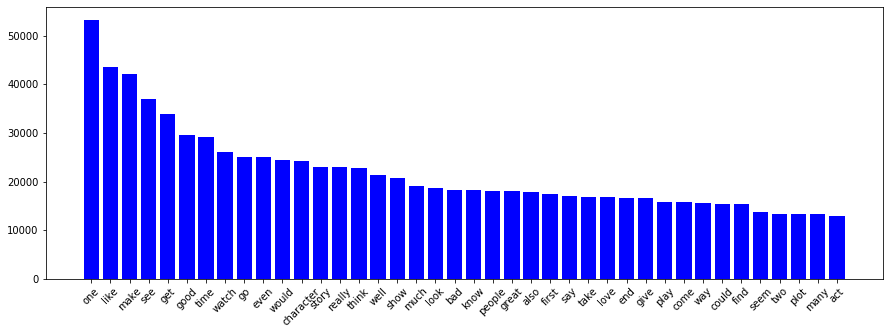

In [25]:
df_freq = df_word_frequency[ df_word_frequency['Frequency'] > 1]
fig = plt.figure(figsize = (15, 5))
plt.bar(df_freq['Word'].head(40), df_freq['Frequency'].head(40), color = 'blue', width = 0.8)
plt.xticks(rotation=45)
plt.show()

**Insight 2: Words like movie and film have the largest occurences.**
We removed those words because they don't add much value to predicting the sentiment in the movie dataset. After removing them words like one, make, like have the highest occurences

**3.4.3 Show all words like movie**

In [26]:
[col for col in df_word_frequency['Word'] if 'movie' in col]

['moviegoers',
 'moviegoer',
 'moviemakers',
 'telemovie',
 'thismovie',
 'imovie',
 'moviemaking',
 'moviemusereviews',
 'horrormovie',
 'locoformovies',
 'movietone',
 'movieland',
 'roadmovie',
 'mymovies',
 'moviedom',
 'moviethe',
 'moviewhen',
 'moviemanmenzel',
 'moviegoing',
 'moviethis',
 'poffysmoviemania',
 'movied',
 'horrormovies',
 'themovie',
 'mcmovies',
 'moviestar',
 'truecastmovie',
 'moviepass',
 'moviehouse',
 'splattermovies',
 'movieeverything',
 'moviewise',
 'movieclips',
 'witsmovie',
 'movieps',
 'moviewatched',
 'roadmovies',
 'movie_',
 'hongkongmovieshootouts',
 'terroristmovie',
 'movieit',
 'pdmoviereview',
 'moviee',
 'moviepicking',
 'horrormoviejournal',
 'skymovies',
 'movieman',
 'horrormoviemaker',
 'tvmovie',
 'moviewatching',
 'moviephysics',
 'shockmovie',
 'bmovies',
 'movieoverall',
 'ccmovieman',
 'movieevents',
 'moviepulse',
 'moviesalso',
 'moviesparticularly',
 'drearymovies',
 'inmovies',
 'machomovie',
 'ccthemovieman',
 'bmoviefreak',


**Insight 3: There are typing errors like forgetting to add space between two words. 
This might be one of the reasons why 40% of the words have only single occurence**

**3.4.4 Look at the words with least occurence**

In [27]:
df_word_frequency.describe() # Power Law Distribution: Natural Law Language Statistics
df_word_frequency.tail(15)

,Word,Frequency
98167,injector,1
98168,cluedo,1
98169,almodavar,1
98170,blunter,1
98171,ofc,1
98172,ladiesman,1
98173,reommended,1
98174,dreariest,1
98175,unsold,1
98176,cukkos,1


In [28]:
df.head(1)

,review,sentiment,review_token,review_cleaned
0,"one of the other reviewers have mention that after watch just oz episode you'll be hooked. they be right, as this be exactly what happen with me.the first thing that strike me about oz be its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this be not show for the faint hearted or timid. this show pull no punch with regard to drugs, sex or violence. its be hardcore, in the classic use of the word.it be call oz as that be the nickname give to the oswald maximum security state penitentary. it focus mainly on emerald city, an experimental section of the prison where all the cells have glass front and face inwards, so privacy be not high on the agenda. em city be home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy deal and shady agreements be never far away.would say the main appeal of the show be due to the fact that it go where other show wouldn'dare. forget pretty picture paint for mainstream audiences, forget charm, forget romance...oz doesn'mess around. the first episode ever saw strike me as so nasty it be surreal, couldn'say be ready for it, but as watch more, develop taste for oz, and get accustom to the high level of graphic violence. not just violence, but injustice (crooked guard who'll be sell out for nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates be turn into prison bitch due to their lack of street skills or prison experience) watch oz, you may become comfortable with what be uncomfortable viewing....thats if you can get in touch with your darker side.",positive,"[one, reviewers, mention, watch, oz, episode, hooked, right, exactly, happen, first, thing, strike, oz, brutality, unflinching, scenes, violence, set, right, word, go, trust, show, faint, hearted, timid, show, pull, punch, regard, drugs, sex, violence, hardcore, classic, use, word, call, oz, nickname, give, oswald, maximum, security, state, penitentary, focus, mainly, emerald, city, experimental, section, prison, cells, glass, front, face, inwards, privacy, high, agenda, em, city, home, many, aryans, muslims, gangstas, latinos, christians, italians, irish, scuffles, death, stares, dodgy, deal, shady, agreements, never, far, away, would, say, main, appeal, show, due, fact, go, show, dare, forget, pretty, picture, paint, mainstream, audiences, forget, ...]",one reviewers mention watch oz episode hooked right exactly happen first thing strike oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pull punch regard drugs sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cells glass front face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy deal shady agreements never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audiences forget charm forget romance oz mess around first episode ever saw strike nasty surreal say ready watch develop taste oz get accustom high level graphic violence violence injustice crooked guard sell nickel inmates kill order get away well mannered middle class inmates turn prison bitch due lack street skills prison experience watch oz may become comfortable uncomfortable viewing thats get touch darker side


**3.5 Show WordCloud for Positive and Negative Reviews**

**3.5.1 Build the function for wordcloud**

In [29]:
def wordcloud_text(df, col_name):
    review_words = ' '.join([word for word in df[col_name]])
    return review_words

**3.5.2 WordCloud for Positive Reviews**

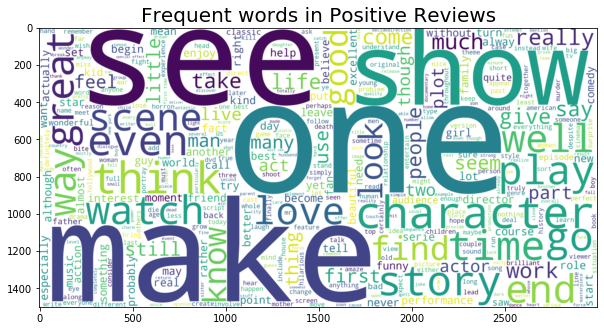

In [30]:
positive_words = wordcloud_text(df[df.sentiment == 'positive'], 'review_cleaned')
plt.figure(figsize=(10,10))
positive_wordcloud = WordCloud(max_words=400, width=3000, height=1500, background_color = 'white').generate(positive_words)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Frequent words in Positive Reviews', fontsize = 20)
plt.show()

**3.5.3 WordCloud for Positive Reviews**

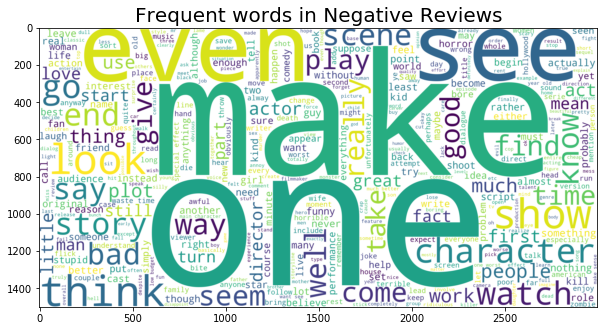

In [31]:
negative_words = wordcloud_text(df[df.sentiment == 'negative'], 'review_cleaned')
plt.figure(figsize=(10,10))
negative_wordcloud = WordCloud(max_words=400, width=3000, height=1500, background_color = 'white').generate(negative_words)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Frequent words in Negative Reviews', fontsize = 20)
plt.show()

### 4. Split data into train and test (70/30)

In [32]:
training, test = train_test_split(df, test_size=0.30, random_state=10)
# Define independent variable (x) and dependent variable (y)
train_x, train_y = training.review.tolist(), training.sentiment.tolist()
# train_x, train_y = [training.review for x in training], [training.sentiment for y in training]

# Test Dataset
test_x, test_y = test.review.tolist(), test.sentiment.tolist()


print("Size of train dataset: ",training.shape )
print("Size of test dataset: ",test.shape )

Size of train dataset:  (34706, 4)
Size of test dataset:  (14875, 4)


Check the class balance for train and test

In [33]:
print(training['sentiment'].value_counts(normalize = 'True').round(3))
print(test['sentiment'].value_counts(normalize = 'True').round(3))

sentiment
positive    0.502
negative    0.498
Name: proportion, dtype: float64
sentiment
positive    0.502
negative    0.498
Name: proportion, dtype: float64


**Bag of Words**

In [34]:
# Using countvectorizer in sklearn, create a bag of words
corpus = df['review_cleaned'].to_list()
vectorizer = CountVectorizer()

#print(vectorizer.get_feature_names()) # the dictionary
#print(vectorizer.fit_transform(corpus).toarray())


# Convert train data to feature vector matrix
train_x_vectors = vectorizer.fit_transform(train_x)
print('Shape of Train Data Vector', train_x_vectors.shape)

# Convert test data to feature vector matrix
test_x_vectors = vectorizer.transform(test_x)
print('Shape of Test Data Vector', test_x_vectors.shape)

Shape of Train Data Vector (34706, 83582)
Shape of Test Data Vector (14875, 83582)


### Word2Vec 
Word2Vec is a method for generating word embeddings. It uses neural network to learn from a large corpus of documents. Word2Vec has advantages over one hot encoding as Word2Vec captures the semantic relationship between words. It's a transformation method. Once we generate the word embedding, we can use models like Naive Bayes to predict the accuracy. Another model that can be used for embeddings is Bert.

### Bert
Bert is a bidirectional model i.e instead of reading the text from left to right or right to left it reads the text from both sides. It's a fairly new model launched by Google in 2018. It has been trained on large corpus of data. It's a transformer based language model.

### tf-idf
tf-idf measures the importance of a word to the document. It adjusts for the Power Law of Distribution in linguistics and assigns the weighting factor accordingly. 

Term frequency is the relative frequency of term within the document. The inverse document frequency measures how much information does the word provide. It is the relative frequency within the set of documents. Weights generally tend to filter out the common words.

tf-idf = tf*idf </br>
tf = # of times terms appears in document/ # of terms in the document
idf = log (# of documents in the corpus/ # of documents in the corpus containing the term)


**For this assignment, we're going to try out the Word2Vec, tf-idf and One Hot Encoding Techniques**

In [35]:
# Write a function to convert Words to Embeddings using W2V

model = Word2Vec(train_x, vector_size=500, window=5, min_count=1)
def w2v_embedding(col):
    return_list = []
    for document in col:
        embeddings = [model.wv[word] for word in document if word in model.wv]
        average_embedding = sum(embeddings) / len(embeddings)
        return_list.append(average_embedding)
    return return_list

In [36]:
# Convert text to word embeddings using word2vec
train_x_w2v = w2v_embedding(train_x)
test_x_w2v = w2v_embedding(test_x)

In [37]:
print(len(train_x_w2v))
print(len(test_x_w2v))
#train_x_w2v

34706
14875


### 5. Train Different Models

#### 5.1 SVM Classifier using Word2Vec
Support Vector Machine builds a hyperplane or set of hyper planes in a highly dimesional place. It uses functinal margin (largest distance to nearest training data point) to build the hyperplane. 

SVM is a good model for high dimensional datasets but doesn't work well on very large datasets.

In [38]:
# Train the SVM classifier
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train_x_w2v, train_y)

# Evaluate the model on test set
pred_svm = clf_svm.predict(test_x_w2v)
accuracy = accuracy_score(test_y, pred_svm)

print(f"Test set accuracy: {accuracy:.3f}")
print(classification_report(test_y, pred_svm))

Test set accuracy: 0.629
              precision    recall  f1-score   support

    negative       0.64      0.59      0.61      7406
    positive       0.62      0.67      0.64      7469

    accuracy                           0.63     14875
   macro avg       0.63      0.63      0.63     14875
weighted avg       0.63      0.63      0.63     14875



#### 5.2 Logistic Regression using One Hot Encoding
Logistic Regression is a classic classification model. It takes the output of a logistic regression function and uses a sigmoid function to estimate te probability of the given class. <br> <br>
There are three types of Logistic Regressions:
<br> 1) **Binomial**: Only 2 possible DV (0/1, True/False, Pass/Fail)
<br> 2) **Multinomial**: 3 or more possible unodered DV (cat/dog/cow)
<br> 3) **Ordinal**: 3 or more possible odered DV (low/medium/high)

In [39]:
# Train the Logistic Regression model
clf_lr = LogisticRegression(solver='liblinear')
clf_lr.fit(train_x_vectors, train_y)

# Evaluate the model on test set
pred_lr = clf_lr.predict(test_x_vectors)
accuracy = accuracy_score(test_y, pred_lr)

print(f"Test set accuracy: {accuracy:.3f}")
print(classification_report(test_y, pred_lr))

Test set accuracy: 0.887
              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      7406
    positive       0.88      0.89      0.89      7469

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



#### 5.3 Random Forest Classifier Using One Hot Encoding
It constructs multiple decision trees and can handle both classification and regression. RF searches for the best feature among a subset of random features. It adds randomness to the model thus preventing overfitting.

In [40]:
# Train the Random Forest model
clf_rfc = RandomForestClassifier()
clf_rfc.fit(train_x_vectors, train_y)

# Evaluate the model on test set
pred_rfc = clf_rfc.predict(test_x_vectors)
accuracy = accuracy_score(test_y, pred_rfc)

print(f"Test set accuracy: {accuracy:.3f}")
print(classification_report(test_y, pred_rfc))

Test set accuracy: 0.849
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      7406
    positive       0.85      0.85      0.85      7469

    accuracy                           0.85     14875
   macro avg       0.85      0.85      0.85     14875
weighted avg       0.85      0.85      0.85     14875



#### 5.4  Naive Bayes using Term Frequency Inverse Document Frequency (tf-idf) embeddings
tf-idf measures the importance of a word to the document. It adjusts for the Power Law of Distribution in linguistics and assigns the weighting factor accordingly. 

Term frequency is the relative frequency of term within the document. The inverse document frequency measures how much information does the word provide. It is the relative frequency within the set of documents. Weights generally tend to filter out the common words.

tf-idf = tf*idf </br>
tf = # of times terms appears in document/ # of terms in the document
idf = log (# of documents in the corpus/ # of documents in the corpus containing the term)

In [41]:
# Train the TFIDF model
clf_tdfidf = TfidfVectorizer()
clf_tdfidf.fit(train_x, train_y)

# Apply tf-idf to training data
train_x_tf = clf_tdfidf.fit_transform(train_x)
#applying tf idf to training data
test_x_tf = clf_tdfidf.transform(test_x)

In [42]:
# Train the Naive Bayes Classifier
clf_nb = MultinomialNB()
clf_nb.fit(train_x_tf, train_y)

# Evaluate the model on test set
pred_nb = clf_nb.predict(test_x_tf)
accuracy = accuracy_score(test_y, pred_nb)

print(f"Test set accuracy: {accuracy:.3f}")
print(classification_report(test_y, pred_nb))
                                                                

Test set accuracy: 0.863
              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      7406
    positive       0.88      0.84      0.86      7469

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



Of all the models tested, model X has the highest accuracy. 

### Next Steps:
1) Fine Tuning Some of these models <br>
2) Post-hoc analysis on where the model did and didn't do well <br>
3) Re-applying those learning to fine tune and clean further to improve the accuracy